# Linear Models


#Actividad Semanal -- -- Actividad Semanal -- 7 Regresiones y K means

#Nombre Juan Villamil

#Matricula:A01794003

#correo: A01794003@tec.mx

#Materia: Ciencia y Analítica de Datos.

#Fecha: 30/10/2022.

#Profesor titular: María de la Paz Rico Fernández.

#Profesor tutor: Orlando Figón Cruz.

(Notebook 1 Regresion 

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

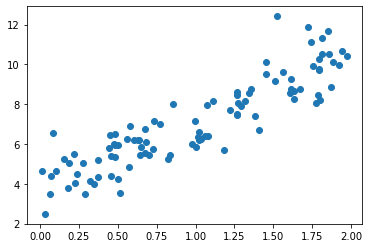

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

In [7]:
#X_fit[]

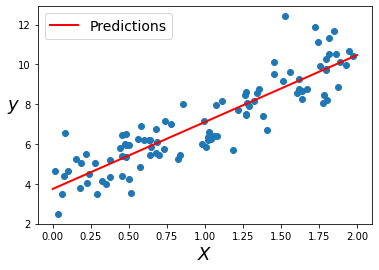

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

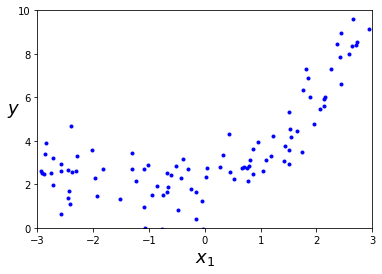

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

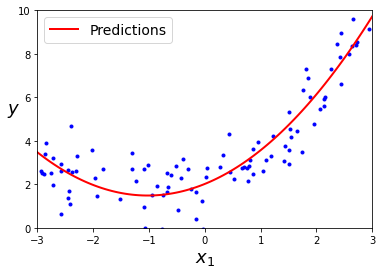

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
282,3.721616,41.496755
837,5.684718,35.075195
807,5.563938,30.078892
948,6.717593,31.416783
161,3.133644,56.183945
234,3.480362,45.066258
957,6.865924,27.901113
974,7.182430,31.221577
479,4.351203,40.618167
414,4.186185,48.143612


In [35]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

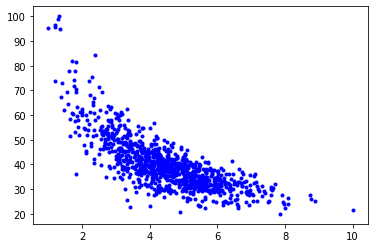

In [27]:
plt.plot(X,y,'b.')

In [38]:
xtrain, xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.2, random_state=10)

print(len(xtrain), len(xtest))

800 200


In [28]:
#lineal

LINEAL

In [43]:
RegresionLineal = LinearRegression(fit_intercept=True)
RegresionLineal.fit(xtrain, ytrain)
RegresionLineal.coef_, RegresionLineal.intercept_
RegresionLineal

LinearRegression()

In [45]:
print(RegresionLineal.coef_)

[-5.917708]


In [47]:
print(xtrain, ytrain)

     Number of Units
188         3.277881
194         3.294658
225         3.418841
580         4.704648
428         4.224622
..               ...
320         3.877161
527         4.533494
996         8.739752
125         2.963645
265         3.661820

[800 rows x 1 columns] 188    48.963874
194    51.081432
225    52.510324
580    37.976470
428    44.177365
         ...    
320    34.295018
527    42.336550
996    27.536542
125    60.881379
265    55.604572
Name: Manufacturing Cost, Length: 800, dtype: float64


In [50]:
RegresionLineal.coef_, RegresionLineal.intercept_

(array([-5.917708]), 66.6344123257405)

In [49]:
print(LinearRegression)

<class 'sklearn.linear_model._base.LinearRegression'>


In [52]:
RegresionLineal.intercept_

66.6344123257405

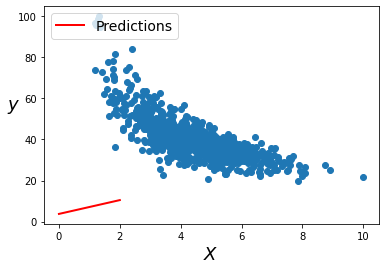

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [54]:
Pred = RegresionLineal.predict(xtrain)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


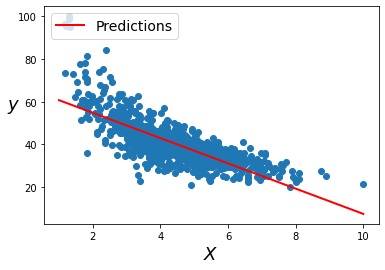

In [58]:
Pred = RegresionLineal.predict(xtrain)
X_fit = np.linspace(1, 10, 100)
y_fit = RegresionLineal.predict(X_fit[:, np.newaxis])
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [59]:
MAE = pd.DataFrame()
RMSE = pd.DataFrame()
R2 = pd.DataFrame()

In [62]:
print('(MAE)', metrics.mean_absolute_error(ytrain, ypred))
print('(RMSE))', np.sqrt(metrics.mean_squared_error(ytrain, ypred)))
print('(R2)',r2_score(ytrain, ypred))

(MAE) 4.820604017193222
(RMSE)) 6.77040782877293
(R2) 0.5807583474715297


In [29]:
#polinomial

In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [74]:
Polinomios = PolynomialFeatures(degree=3, include_bias=False)
X_Polinomio = Polinomios.fit_transform(X_train)
X_Polinomio_testeo = Polinomios.fit_transform(X_test)

In [80]:
RegresionLineal = LinearRegression(fit_intercept=True)
RegresionLineal.fit(X_poly_train, y_train)
RegresionLineal.coef_, RegresionLineal.intercept_

(array([-32.54637447,   4.74715887,  -0.24753202]), 110.3994754620544)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


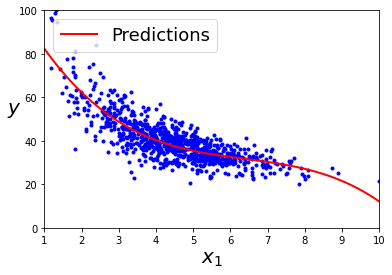

In [103]:
X_new = np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = RegresionLineal.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.legend(loc="upper left", fontsize=18)
plt.axis([1, 10, 0, 100]);

In [92]:
MAE = pd.DataFrame()
RMSE = pd.DataFrame()
R2 = pd.DataFrame()

In [142]:
y_pred = RegresionLineal.predict(X_Polinomio)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypred)))
print('r2_score',r2_score(ytrain, ypred))



print('(MAE)', metrics.mean_absolute_error(ytrain, ypred), True)
print('(RMSE))', np.sqrt(metrics.mean_squared_error(ytrain, ypred)), True)
print('(R2)',r2_score(ytrain, ypred)), True

Error medio Absoluto (MAE): 4.820604017193222
Root Mean Squared Error: 6.77040782877293
r2_score 0.5807583474715297
(MAE) 4.820604017193222 True
(RMSE)) 6.77040782877293 True
(R2) 0.5807583474715297


(None, True)

Ridge y Lasso

In [120]:
MRidge = Ridge(alpha=0.5)
Mr=MRidge.fit(xtrain,ytrain)
Mr


Ridge(alpha=0.5)

In [121]:
Mr.coef_, Mr.intercept_

(array([-5.91566894]), 66.62530567722436)

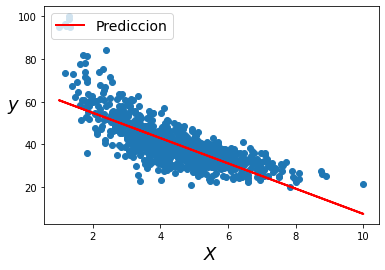

In [125]:
Ypredicion = Mr.predict(xtrain)
plt.scatter(X, y)
plt.plot(xtrain, ypredrd, "r-", linewidth=2, label="Prediccion")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [141]:
y_pred = RegresionLineal.predict(X_Polinomio)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypred)))
print('r2_score',r2_score(ytrain, ypred))

print('(MAE)', metrics.mean_absolute_error(ytrain, ypred), True)
print('(RMSE))', np.sqrt(metrics.mean_squared_error(ytrain, ypred)), True)
print('(R2)',r2_score(ytrain, ypred)), True

Error medio Absoluto (MAE): 4.820604017193222
Root Mean Squared Error: 6.77040782877293
r2_score 0.5807583474715297
(MAE) 4.820604017193222 True
(RMSE)) 6.77040782877293 True
(R2) 0.5807583474715297


(None, True)

In [128]:
lasso_R = Lasso(fit_intercept=True)
lasso_R.fit(X_poly_train, y_train)
lasso_R.coef_, linear_reg_lasso.intercept_

(array([-0.       , -1.9395849,  0.1753369]), 62.353449206844175)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


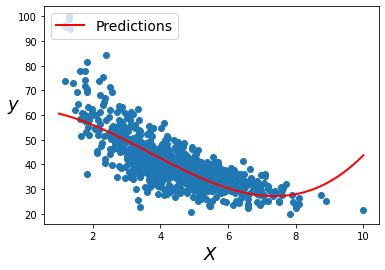

In [130]:
X_fit = np.linspace(1, 10, 100).reshape(100, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = lasso_R.predict(X_fit_poly)

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [132]:
lasso_R.coef_, lasso_R.intercept_

(array([-0.       , -1.9395849,  0.1753369]), 62.353449206844175)

In [140]:
y_pred = lasso_R.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypred)))
print('r2_score',r2_score(ytrain, ypred))

print('(MAE)', metrics.mean_absolute_error(ytrain, ypred), True)
print('(RMSE))', np.sqrt(metrics.mean_squared_error(ytrain, ypred)), True)
print('(R2)',r2_score(ytrain, ypred)), True

Error medio Absoluto (MAE): 4.820604017193222
Root Mean Squared Error: 6.77040782877293
r2_score 0.5807583474715297
(MAE) 4.820604017193222 True
(RMSE)) 6.77040782877293 True
(R2) 0.5807583474715297


(None, True)

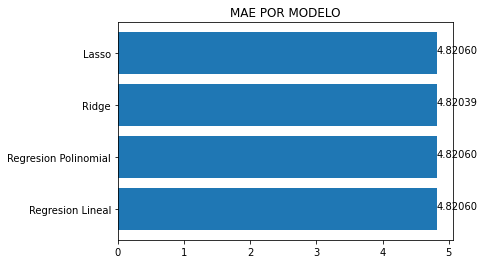

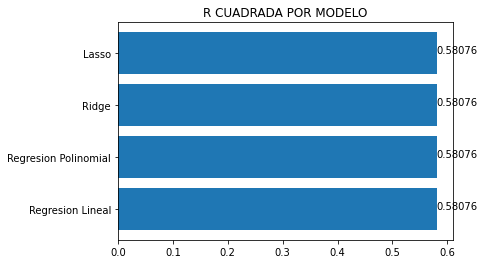

In [157]:
modelos=('Regresion Lineal', 'Regresion Polinomial', 'Ridge', 'Lasso')

errormae=(metrics.mean_absolute_error(ytrain, ypred),
          metrics.mean_absolute_error(ytrain, ypred),
          metrics.mean_absolute_error(ytrain, ypredrd),
          metrics.mean_absolute_error(ytrain, ypred))

rcuadrada=(r2_score(ytrain, ypred),
          r2_score(ytrain, ypred),
          r2_score(ytrain, ypredrd),
          r2_score(ytrain, ypred))

plt.barh(modelos, errormae)
plt.title('MAE POR MODELO')
for index, value in enumerate(errormae):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

plt.barh(modelos, rcuadrada)
plt.title('R CUADRADA POR MODELO')
for index, value in enumerate(rcuadrada):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [160]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [161]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


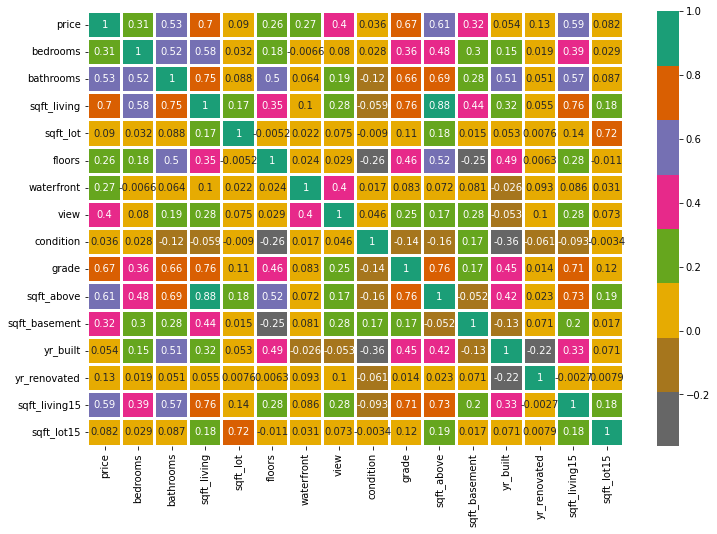

In [162]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [163]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí

In [166]:
line=LinearRegression()
line.fit(X_train, y_train)

LinearRegression()

In [167]:
line.coef_, line.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [168]:
y_predh = line.predict(X_train)
y_predh

array([[1112664.84157667],
       [1277053.14499139],
       [ 963964.24705483],
       ...,
       [ 354926.82601979],
       [ 458051.24430887],
       [ 339033.00138358]])

In [169]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predh)))
print('r2_score',r2_score(y_train, y_predh))

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


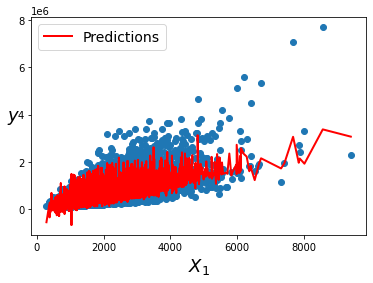

In [171]:
y_fit = line.predict(X_train.sort_values('sqft_above'))

plt.scatter(X_train['sqft_above'], y_train)
plt.plot(X_train['sqft_above'].sort_values(), y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [172]:
polii = PolynomialFeatures(degree=2, include_bias=True)
xpolyh = polii.fit_transform(X_train)

PH = LinearRegression(fit_intercept=True)
PH.fit(xpolyh, y_train)

LinearRegression()

In [173]:
PH.coef_, PH.intercept_

(array([[-3.36215067e+02,  9.33786601e+05, -1.09276012e+06,
         -5.00000916e+02, -2.78655818e+01, -2.07431876e+06,
         -3.95454208e+06, -2.88626046e+05,  5.58593032e+05,
          1.09860635e+06, -1.76306376e+02, -3.38830099e+02,
         -8.59690742e+04, -2.95364696e+03,  3.99966813e+03,
         -3.40100969e+01,  9.57353093e+02,  7.49573773e+03,
         -1.43129923e+01, -1.86055609e-02,  8.57765264e+03,
         -1.15023978e+04, -3.07568695e+02, -5.24425041e+03,
         -5.36756662e+03, -6.90375101e-01, -1.40883136e+01,
         -4.67027049e+02, -9.12671559e+00,  1.72774587e+01,
          2.15692510e-01, -9.63018996e+03,  1.55434606e+01,
         -1.35758634e-01, -2.59069352e+04,  4.33710369e+04,
          3.82965496e+03, -1.07945148e+03,  2.22974058e+04,
          1.42714685e+01,  1.18111267e+00,  5.03113646e+02,
         -1.70855006e+01, -1.72874822e+01, -5.57330742e-02,
         -4.95300818e-01, -1.18373560e+00,  4.83455018e+00,
          1.60300634e+02, -1.42701954e+0

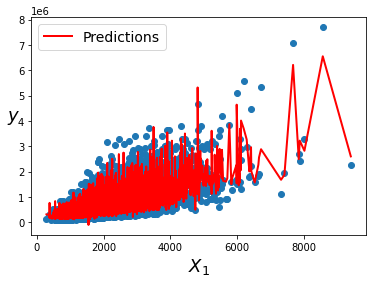

In [176]:
X_new_poly = polii.transform(X_train.sort_values('sqft_above'))
y_new = PH.predict(X_new_poly)

plt.scatter(X_train['sqft_above'], y_train)
plt.plot(X_train['sqft_above'].sort_values(), y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [180]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predh)))
print('r2_score',r2_score(y_train, y_predh))



Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [183]:
RI = Ridge(alpha=0.5)
MRI=RI.fit(X_train,y_train)
MRI

Ridge(alpha=0.5)

In [191]:
MRI.coef_, MRI.intercept_

(array([[-3.82100584e+04,  4.14585368e+04,  1.08003254e+02,
          1.70333431e-02,  3.16904271e+04,  5.50465705e+05,
          4.13530518e+04,  2.12243047e+04,  1.19481869e+05,
          4.77909538e+01,  6.02120735e+01, -3.55070118e+03,
          1.32888148e+01,  2.89955097e+01, -5.48065224e-01]]),
 array([6151054.47475121]))

In [192]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predh)))
print('r2_score',r2_score(y_train, y_predh))

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [198]:
modlassoh = Lasso(alpha=0.5)
mlh=modlassoh.fit(X_train,y_train)
mlh

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.5)

In [199]:
mlh.coef_, mlh.intercept_

(array([-3.82001697e+04,  4.14639974e+04,  2.93481362e+02,  1.71319410e-02,
         3.16894162e+04,  5.52616066e+05,  4.12521441e+04,  2.12207672e+04,
         1.19492527e+05, -1.37711415e+02, -1.25270275e+02, -3.55087610e+03,
         1.32615337e+01,  2.90056291e+01, -5.48134339e-01]),
 array([6151319.68832076]))

In [200]:
y_predmlh = mlh.predict(X_train)
y_predmlh

array([1112678.27001617, 1277054.20553411,  963961.77466993, ...,
        354926.26630027,  458050.40024466,  339033.98812825])

In [201]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predmlh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predmlh)))
print('r2_score',r2_score(y_train, y_predmlh))

Error medio Absoluto (MAE): 139269.33738701555
Root Mean Squared Error: 214234.88236797805
r2_score 0.6529196650136231


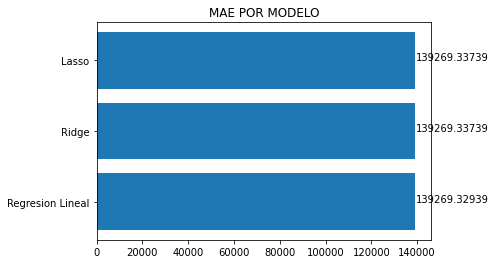

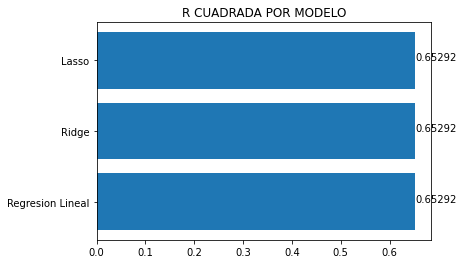

In [208]:
modelos=('Regresion Lineal', 'Ridge', 'Lasso')

errormae=(metrics.mean_absolute_error(y_train, y_predh),
          metrics.mean_absolute_error(y_train, y_predmlh),
          metrics.mean_absolute_error(y_train, y_predmlh))

rcuadrada=(r2_score(y_train, y_predh),

          r2_score(y_train, y_predmlh),
          r2_score(y_train, y_predmlh))

plt.barh(modelos, errormae)
plt.title('MAE POR MODELO')
for index, value in enumerate(errormae):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

plt.barh(modelos, rcuadrada)
plt.title('R CUADRADA POR MODELO')
for index, value in enumerate(rcuadrada):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()